In [1]:
# standard libraries
import math, os, time, sys
import numpy as np
from datetime import datetime

import scipy

# plotting
import matplotlib.pyplot as plt

In [17]:
ImagePath = os.path.abspath('./Figures')
ImagePath

'c:\\Users\\20183003\\Desktop\\PINNs\\Figures'

In [3]:
from Main import Canonical

Show the approximation using the canonical basis for $\epsilon=0.1$ and $n=6$

0.017477941986856697


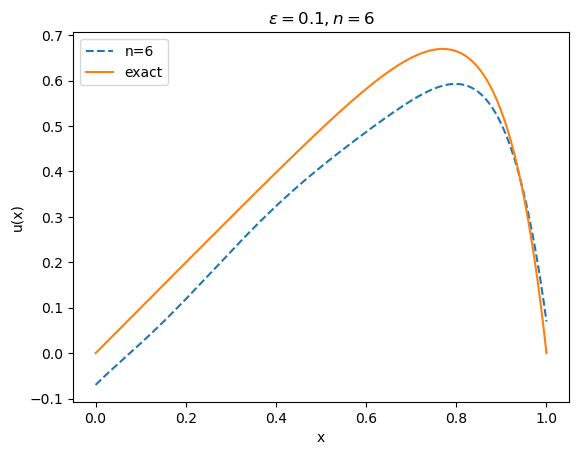

In [5]:
Canonical.show_approx(6,0.1)

In [6]:
from Main import Legendre

Show the approximation using the canonical basis for $\epsilon=0.1$ and $n=10$

1.4639115436077806e-06
29991.588982868707


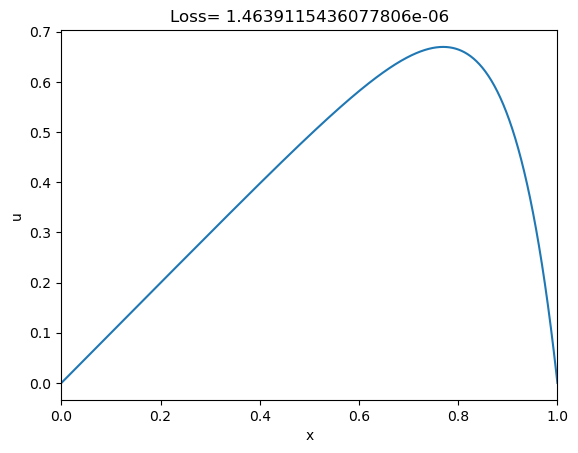

In [8]:
Lsol = Legendre.Legendre_solution(10,0.1)
print(Lsol.Loss)
print(Lsol.cond())
Lsol.show_approx()

## Condition Number

Compare the condition number of the Canonical basis and the Legendre basis

In [10]:
epsil_list = np.logspace(-4,0,100)
condA_list5 = []
condAn_list5=[]
condA_list10 = []
condAn_list10=[]
condA_list15 = []
condAn_list15=[]
condA_list20 = []
condAn_list20=[]
for epsil in epsil_list:
    An,b1=Canonical.A_n(5,epsil,1/2)
    condAn_list5.append(np.linalg.cond(An))
    condA_list5.append(Legendre.Legendre_solution(5,epsil).cond())
        
    An,b1=Canonical.A_n(10,epsil,1/2)
    condAn_list10.append(np.linalg.cond(An))
    condA_list10.append(Legendre.Legendre_solution(10,epsil).cond())

    An,b1=Canonical.A_n(15,epsil,1/2)
    condAn_list15.append(np.linalg.cond(An))
    condA_list15.append(Legendre.Legendre_solution(15,epsil).cond())


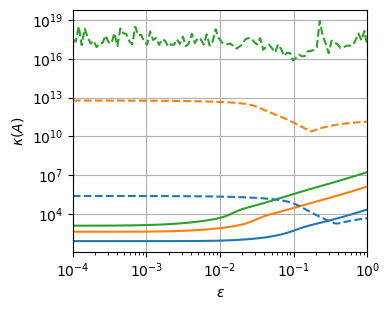

In [18]:
plt.figure(figsize=[4,3.2])
plt.loglog(epsil_list,condA_list5,label='$L_5$')
plt.loglog(epsil_list,condA_list10,label='$L_{10}$')
plt.loglog(epsil_list,condA_list15,label='$L_{15}$')

plt.gca().set_prop_cycle(None)

plt.loglog(epsil_list,condAn_list5,'--',label='$C_5$')
plt.loglog(epsil_list,condAn_list10,'--',label='$C_{10}$')
plt.loglog(epsil_list,condAn_list15,'--',label='$C_{15}$')
#plt.legend()
plt.grid()
plt.xlabel('$\epsilon$')
plt.xlim([1e-4,1])
plt.ylabel('$\kappa(A)$')
savepath = os.path.join(ImagePath, 'CondNr.pdf')
plt.tight_layout()
plt.savefig(savepath)

## Coefficients

Compare the resulting coefficients

In [19]:
epsil_list = np.logspace(-4,0,100)
coefA_list5 = []
coefAn_list5=[]
coefA_list10 = []
coefAn_list10=[]
coefA_list15 = []
coefAn_list15=[]
coefA_list20 = []
coefAn_list20=[]
for epsil in epsil_list:
    An,b1=Canonical.A_n(5,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list5.append(maxcoef)
    coefA_list5.append(np.max(Legendre.Legendre_solution(5,epsil).coeffs))
        
    An,b1=Canonical.A_n(10,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list10.append(maxcoef)
    coefA_list10.append(np.max(Legendre.Legendre_solution(10,epsil).coeffs))

    An,b1=Canonical.A_n(15,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list15.append(maxcoef)
    coefA_list15.append(np.max(Legendre.Legendre_solution(10,epsil).coeffs))


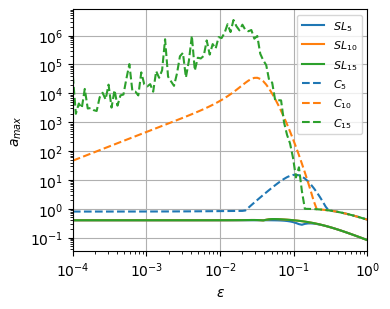

In [20]:
plt.figure(figsize=[4,3.2])
plt.loglog(epsil_list,coefA_list5,label='$SL_5$')
plt.loglog(epsil_list,coefA_list10,label='$SL_{10}$')
plt.loglog(epsil_list,coefA_list15,label='$SL_{15}$')
#plt.loglog(epsil_list,coefA_list20,label='$n=20$')

plt.gca().set_prop_cycle(None)

plt.loglog(epsil_list,coefAn_list5,'--',label='$C_5$')
plt.loglog(epsil_list,coefAn_list10,'--',label='$C_{10}$')
plt.loglog(epsil_list,coefAn_list15,'--',label='$C_{15}$')
# plt.loglog(epsil_list,coefAn_list20,'--',label='Canonical basis, $n=20$')
plt.legend(fontsize=8)
plt.grid()
plt.xlabel('$\epsilon$')
plt.xlim([1e-4,1])
plt.ylabel('$a_{max}$')
#plt.yticks([1e0,1e2,1e4,1e6])
savepath = os.path.join(ImagePath, 'Coef.pdf')
plt.tight_layout()
plt.savefig(savepath)

## Experiments

In [21]:
def check_poly(eps0, pow, n0):
    epsil_list = np.logspace(eps0,0,50)
    epsil2_list = []
    loss_list = []
    for epsil in epsil_list:
        n=(1/epsil)**(1/pow)*n0
        n = int(np.ceil(n))
        epsil2 = (n0/n)**pow
        loss=Legendre.Legendre_solution(n,epsil2).Loss
        epsil2_list.append(epsil2)
        loss_list.append(loss)
        print(n,epsil2, end='\r')
    return epsil2_list, loss_list

Vary $\beta$

In [22]:
epsil_list0_75, loss_list0_75= check_poly(-2, 1/1.25, 1)
epsil_list1_00, loss_list1_00= check_poly(-2, 1.00, 1)
epsil_list1_25, loss_list1_25= check_poly(-2.5, 1/0.75, 1)
epsil_list1_50, loss_list1_50= check_poly(-3, 1/0.5, 1)

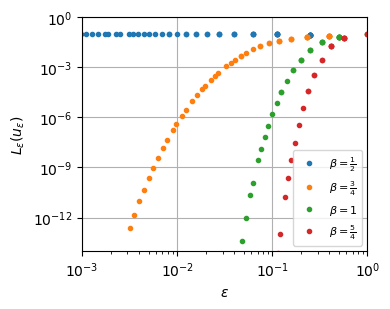

In [23]:
plt.figure(figsize=[4,3.2])
plt.grid()
plt.loglog(epsil_list1_50,loss_list1_50,'.',label='$\\beta=\\frac{1}{2}$')
plt.loglog(epsil_list1_25,loss_list1_25,'.',label='$\\beta=\\frac{3}{4}$')
plt.loglog(epsil_list1_00,loss_list1_00,'.',label='$\\beta=1$')
plt.loglog(epsil_list0_75,loss_list0_75,'.',label='$\\beta=\\frac{5}{4}$')

plt.xlabel('$\epsilon$')
plt.ylabel('$L_\epsilon(u_\epsilon)$')
plt.legend(fontsize=8)
plt.xlim([1e-3,1])
plt.ylim([1e-14,1])
plt.yticks([1,1e-3,1e-6,1e-9,1e-12])
savepath = os.path.join(ImagePath, 'difBeta.pdf')
plt.tight_layout()
plt.savefig(savepath)

Vary $n_0$

In [24]:
epsil_list4, loss_list4= check_poly(-5, 1/0.51, 4)
epsil_list3, loss_list3= check_poly(-5, 1/0.51, 3)
epsil_list2, loss_list2= check_poly(-5, 1/0.51, 2)


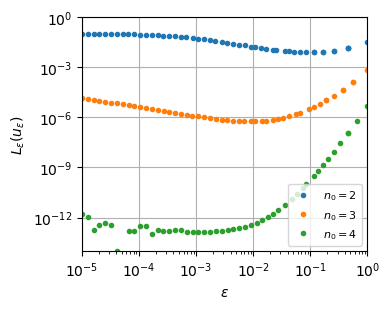

In [25]:
plt.figure(figsize=[4,3.2])
plt.grid()
plt.loglog(epsil_list2,loss_list2,'.',label='$n_0=2$')
plt.loglog(epsil_list3,loss_list3,'.',label='$n_0=3$')
plt.loglog(epsil_list4,loss_list4,'.',label='$n_0=4$')
plt.xlabel('$\epsilon$')
plt.ylabel('$L_\epsilon(u_\epsilon)$')
plt.legend(fontsize=8)
plt.xlim(1e-5,1)
plt.ylim([1e-14,1])
plt.yticks([1,1e-3,1e-6,1e-9,1e-12])
savepath = os.path.join(ImagePath, 'difN0.pdf')
plt.tight_layout()
plt.savefig(savepath)

## GIFs

In [27]:
ImagePath = os.path.abspath('./GIFs')
ImagePath

'c:\\Users\\20183003\\Desktop\\PINNs\\GIFs'

In [26]:
epsil_list = np.linspace(0.01,1,100)
for epsil in epsil_list:
    Res = Legendre.Legendre_solution(int(1/epsil),epsil)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

#epsil_list = np.flip(np.logspace(-3,np.log10(1/2),100))
def make_animation(n_list,epsil_list,save_path, V=-1, xl=-0.5, xu=1):

    fig, ax = plt.subplots()

    ax.set_xlim([0,1])
    ax.set_ylim([xl,xu])

    x = np.linspace(0,1,1000)
    line, = ax.plot(x, x)


    def animate(i):
        #Res = Legendre_solution(int(1/epsil_list[i]),epsil_list[i])
        if V == -1:
            Res = Legendre.Legendre_solution(n_list[i],epsil_list[i])
            line.set_ydata(Res.y_coords())  # update the data.
        else:
            line.set_ydata(V(x,epsil_list[i]))
        ax.set_title("$\\epsilon$={:.5f}".format(epsil_list[i]))
        return line,


    ani = animation.FuncAnimation(
        fig, animate, interval=20, blit=True, save_count=100)

    # To save the animation, use e.g.
    #
    # ani.save("movie.mp4")
    #
    # or
    #
    # writer = animation.FFMpegWriter(
    #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
    # ani.save("movie.mp4", writer=writer)

    writer = animation.PillowWriter(fps=10,
                                    metadata=dict(artist='Martijn Kessels'),
                                    bitrate=1800)
    ani.save(save_path, writer=writer)

    plt.show()

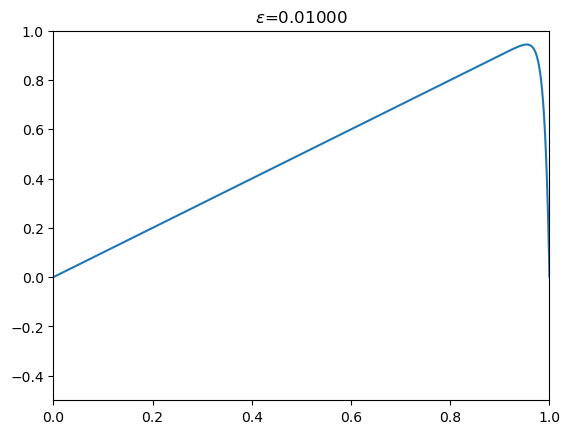

In [29]:
n_list = np.arange(1,101,1)
eps_list = 1/n_list
make_animation(n_list,eps_list,'GIFs/sol.gif')

In [30]:
def u2(x,epsil):
    return (2 + 2*np.exp(1)**epsil**(-1) - 4*np.exp(1)**(x/epsil) + 5*np.pi - \
5*np.exp(1)**(x/epsil)*np.pi - 5*np.pi*x**2 + \
5*np.exp(1)**epsil**(-1)*np.pi*x**2 + 10*np.pi*epsil - \
10*np.exp(1)**(x/epsil)*np.pi*epsil - 10*np.pi*x*epsil + \
10*np.exp(1)**epsil**(-1)*np.pi*x*epsil + 125*np.pi**3*epsil**2 - \
125*np.exp(1)**(x/epsil)*np.pi**3*epsil**2 - \
125*np.pi**3*x**2*epsil**2 + \
125*np.exp(1)**epsil**(-1)*np.pi**3*x**2*epsil**2 + \
250*np.pi**3*epsil**3 - 250*np.exp(1)**(x/epsil)*np.pi**3*epsil**3 - \
250*np.pi**3*x*epsil**3 + \
250*np.exp(1)**epsil**(-1)*np.pi**3*x*epsil**3 + 2*np.cos(5*np.pi*x) \
- 2*np.exp(1)**epsil**(-1)*np.cos(5*np.pi*x) - \
10*np.pi*epsil*np.sin(5*np.pi*x) + \
10*np.exp(1)**epsil**(-1)*np.pi*epsil*np.sin(5*np.pi*x))/(10*(-1 + \
np.exp(1)**epsil**(-1))*np.pi*(1 + 25*np.pi**2*epsil**2))

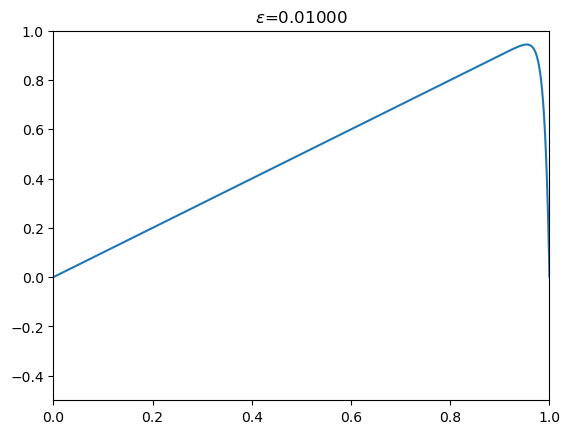

In [31]:
n_list = np.arange(1,101,1)
#eps_list = np.flip(np.logspace(-3,0,100))
eps_list = 1/n_list
make_animation(n_list,eps_list,'GIFs/sol.gif')

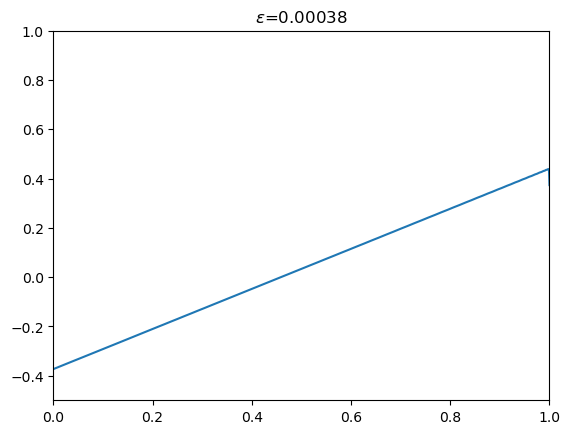

In [32]:
n_list = np.arange(1,101)
#eps_list = np.flip(np.logspace(-3,0,100))
eps_list = 3*(1/n_list)**1.95
make_animation(n_list,eps_list,'GIFs/solfast.gif')

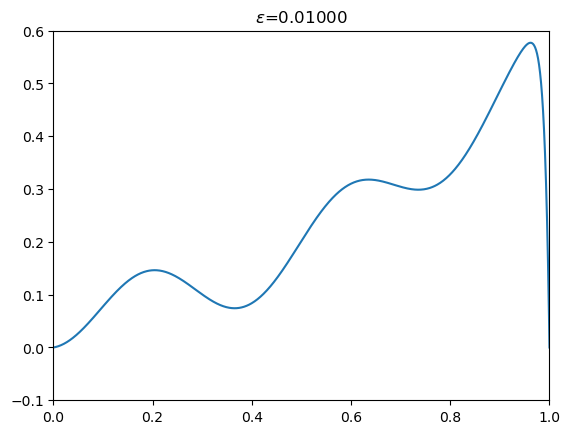

In [33]:
n_list = np.arange(1,101,1)
#eps_list = np.flip(np.logspace(-3,0,100))
eps_list = 1/n_list
make_animation(n_list,eps_list,'GIFs/sol2.gif', u2, -0.1,0.6)

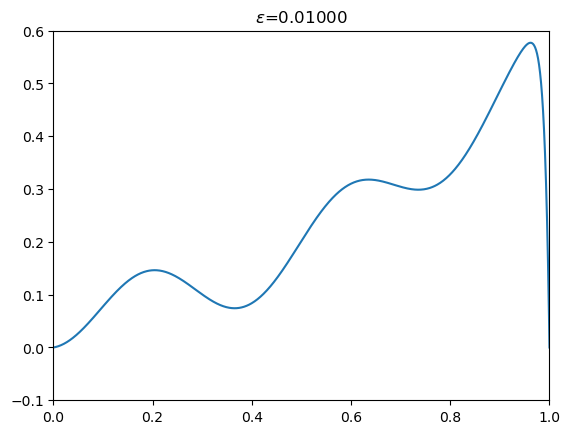

In [34]:
n_list = np.arange(1,101,1)
eps_list = np.flip(np.logspace(-2,0,100))
make_animation(n_list,eps_list,'GIFS/sol3.gif', u2, -0.1,0.6)

In [35]:
def uex(x,epsil):
    return x+ 1/(np.exp(1/epsil)-1)*(1-np.exp(x/epsil))

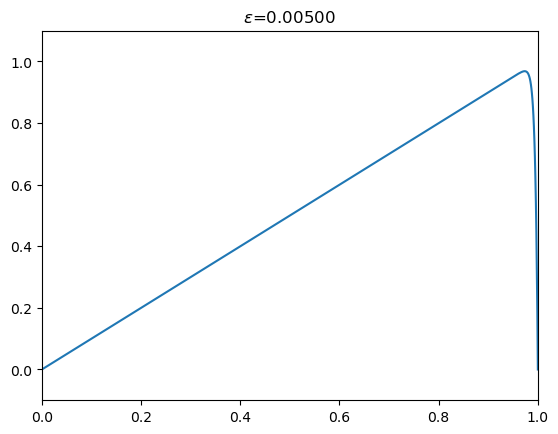

In [36]:
n_list = np.arange(1,101,1)
eps_list = np.flip(np.logspace(-2.3010299956639813,0,100))
make_animation(n_list,eps_list,'GIFS/solex.gif', uex, -0.1,1.1)